In [2]:
import pickle
with open("output.pickle","rb") as fr:
    data = pickle.load(fr)

In [81]:
round(data[100]['bbox'][3],5)

65.19061

In [85]:
data[-1]

{'image_id': 4870,
 'category_id': 7,
 'bbox': [756.3570556640625,
  330.82391357421875,
  62.1602783203125,
  88.8143310546875],
 'score': 0.00010739688150351867,
 'segmentation': []}

In [117]:
imsi = list(data[4873].values())[:-1]
imsi

[64,
 1,
 [640.1660766601562, 59.24696350097656, 105.082763671875, 126.95881652832031],
 0.0006289650336839259]

In [118]:
len(data)

327080

In [111]:
for i in range(3000,3001):
    print('test/'+str(i).zfill(4)+'.jpg')

test/3000.jpg


In [30]:
import os
import pandas as pd
from pandas import DataFrame
from pycocotools.coco import COCO
import numpy as np

In [163]:
# submission 양식에 맞게 output 후처리
prediction_strings = []
file_names = []

class_num = 10
flag = 0
for i in range(0,4871):
    prediction_string = ''
    while True:
        tmp = list(data[flag].values())[:-1]
        if tmp[0] !=i:
            break;
        prediction_string += str(tmp[1]) + ' ' + str(round(tmp[3],5)) + ' ' + str(round(tmp[2][0],5)) + ' ' + str(round(tmp[2][1],5)) + ' ' + str(round(tmp[2][2]+tmp[2][0],5)) + ' ' + str(round(tmp[2][3]+tmp[2][1],5)) + ' '
        flag = flag + 1
        if(flag>=len(data)):
            break;
    prediction_strings.append(prediction_string)
    file_names.append('test/'+str(i).zfill(4)+'.jpg')
    if(flag>=len(data)):
        break;

submission = pd.DataFrame()
submission['PredictionString'] = prediction_strings
submission['image_id'] = file_names
submission.to_csv(os.path.join(f'submission_yolox.csv'), index=None)
submission.head()


,PredictionString,image_id
0,7 0.98138 216.4039 50.77592 456.36063 470.3271...,test/0000.jpg
1,5 0.96565 338.38007 252.33409 755.77899 697.65...,test/0001.jpg
2,1 0.97259 75.91368 272.43591 427.68974 601.406...,test/0002.jpg
3,9 0.88525 112.37469 233.92944 847.78888 857.14...,test/0003.jpg
4,1 0.86527 198.7211 258.5123 855.53726 785.0804...,test/0004.jpg


In [142]:
import cv2
import matplotlib.pyplot as plt

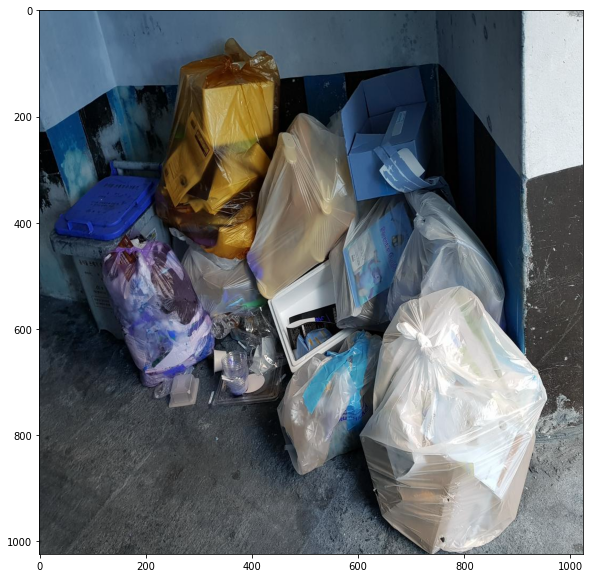

In [158]:
rd = '/opt/ml/detection/dataset/'
ab = cv2.imread(rd+file_names[0])
plt.figure(figsize=(10,10))
plt.imshow(ab)

In [161]:
import yolox.demo

ModuleNotFoundError: No module named 'yolox.demo'